## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Beer Advocate Project</p>

![image.png](https://www.theepicureanbeers.co.uk/cdn/shop/articles/AdobeStock_599782467-min.jpg?v=1690787382)

<a id="toc"></a>

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [Introduction](#0)
* [I. Importing Related Libraries](#1)
* [II. Load Data and Data Review](#2)
* [III. Feature Engineering](#3)
* [IV. Questions & Analysis](#4)

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>

   The Beer Advocate dataset offers rich insights into the beer industry, capturing various aspects such as beer types, breweries, user reviews, and ratings. This exploratory data analysis aims to uncover patterns and trends in beer preferences, quality assessments, and consumer demographics. The primary targets include identifying popular beer categories, analyzing factors contributing to high ratings, and understanding consumer feedback. Through this analysis, we expect to gain a deeper understanding of market demands, quality benchmarks, and potential areas for product enhancement in the brewing industry.

   This analysis will also address key questions about the dataset to offer practical insights and recommendations. We aim to identify the breweries producing the strongest beers by ABV (alcohol by volume), highlighting brands known for bold flavors and high potency. Additionally, we will explore how to recommend top beers by analyzing factors such as user ratings, review sentiments, and style consistency, ensuring recommendations align with diverse taste preferences. Another key focus will be identifying the attributes that impact beer quality, such as flavor, aroma, and appearance, to understand their correlation with high ratings. For enthusiasts who appreciate beers with aromas and appearances that align closely with traditional beer styles, we’ll provide tailored suggestions, helping users select options that best match their preferences for authentic beer experiences.

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">I. Importing Related Libraries</p>

<a id="1"></a>

In [14]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.1f}'.format)

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">II. Load Data and Data Review</p>

<a id="2"></a>

In [5]:
df_review = pd.read_csv("beer_reviews.csv")

In [6]:
df_review

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [7]:
df_review.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [8]:
df_review.sample(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
66943,339,Flying Fish Brewing Company,1265501111,4.0,3.5,3.5,IgnatiusReilly,American Porter,4.5,4.0,Imperial Espresso Porter,8.0,34893
1198813,9629,Short's Brewing Company,1303659485,3.5,3.5,3.5,THECPJ,Irish Dry Stout,3.5,4.0,Short's Uncle Steve's Irish Stout,5.5,54845
1025334,3760,Mill Street Brew Pub,1280718253,4.0,3.5,4.0,notdan,Roggenbier,4.0,4.5,Mill Street Schleimhammer Roggenbier,5.2,54198
1526584,45,Brooklyn Brewery,1296865240,4.0,3.0,4.0,Lordcheez,American Amber / Red Lager,3.5,4.0,Brooklyn Lager,5.2,148
418803,73,Great Lakes Brewing Company,1185932046,5.0,4.0,4.0,lackenhauser,Russian Imperial Stout,4.5,5.0,Great Lakes Blackout Stout,9.0,15813
1298091,29,Anheuser-Busch,1226440923,2.5,1.5,3.0,witster18,Dunkelweizen,2.5,3.5,Michelob DunkelWeisse,5.5,43929
1178759,10099,Dogfish Head Brewery,1302664744,4.0,3.5,4.0,Nerudamann,Belgian Strong Dark Ale,4.0,3.5,Raison D'etre,8.0,1180
420261,73,Great Lakes Brewing Company,1124831809,4.5,4.5,4.5,karst,Witbier,4.5,4.5,Great Lakes Holy Moses,5.4,9353
1512897,323,Harviestoun Brewery Ltd.,1141006941,4.0,4.0,3.0,hunteraw,English India Pale Ale (IPA),3.5,4.0,Bitter & Twisted,4.2,4720
976559,10397,Sly Fox Brewing Company,1153023323,4.0,4.5,4.0,DrJay,Quadrupel (Quad),4.0,4.5,Ichor,10.0,29730


In [9]:
df_review.shape

(1586614, 13)

In [5]:
df_review.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [4]:
df_review.describe().T

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3130.1,5578.1,1.0,143.0,429.0,2372.0,28003.0
review_time,1586614.0,1224089280.0,76544274.5,840672001.0,1173224188.2,1239202881.5,1288568405.2,1326285348.0
review_overall,1586614.0,3.8,0.7,0.0,3.5,4.0,4.5,5.0
review_aroma,1586614.0,3.7,0.7,1.0,3.5,4.0,4.0,5.0
review_appearance,1586614.0,3.8,0.6,0.0,3.5,4.0,4.0,5.0
review_palate,1586614.0,3.7,0.7,1.0,3.5,4.0,4.0,5.0
review_taste,1586614.0,3.8,0.7,1.0,3.5,4.0,4.5,5.0
beer_abv,1518829.0,7.0,2.3,0.0,5.2,6.5,8.5,57.7
beer_beerid,1586614.0,21712.8,21818.3,3.0,1717.0,13906.0,39441.0,77317.0


#### According to statistical summary of beer advocat dataset:

1) I did some internet research on **review_time** values and found out that they are **Unix timestamps** that show the each year the given review was given.  As an example, the minimum value of the review_time column in the dataset, 840672001, is actually equivalent to 1996. The maximum value, 1326285348, is equivalent to 2012. The reason for the large amount of the dataset is that it contains reviews covering a long period of time. 

2) The average **review_overall**, **review_aroma**, **review_appearance**, **review_palate** and **review_taste** scores are close to each other, with most reviews between 3.5 and 4.5. This shows that users generally rate the beers quite positively. 

    I noticed something that needs to be examined here; some reviews start from 1 and go up to 5, while others start from 0. So it is necessary to understand whether the rating range is 0-5 or 1-5. 

3) Finally, it is clear from **count** that there are some missing values in **beer_abv** column.

In [9]:
df_review.describe(include=object).T

,count,unique,top,freq
brewery_name,1586599,5742,Boston Beer Company (Samuel Adams),39444
review_profilename,1586266,33387,northyorksammy,5817
beer_style,1586614,104,American IPA,117586
beer_name,1586614,56857,90 Minute IPA,3290


#### According to categorical columns:

1) The most frequently reviewed **brewery_name** is **Boston Beer Company (Samuel Adams)**. It will be good to know for further stages in our analysis. 

2) It is seen that in the **review_profilename**, there are 33387 profiles, which means that around 34K people have reviewed at least once. 

3) Based on the frequency, **American IPA** is the most popular **beer_style**. 

3) It is noticed that the most reviewed beer is **90 Minute IPA** as **beer_name**. 

4) In conclusion, the summary of categorical values was observed with statistical data. In order to extract some insights from these statisticals details, their relationship to each other needs to be examined. 

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">III. Feature Engineering</p>

<a id="3"></a>

In [7]:
df_review.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [10]:
df_review.duplicated().sum()

0

* There is not any duplicated value. 

In [11]:
df_review.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [13]:
pd.set_option('display.float_format', '{:.3f}'.format)

round((df_review.isna().sum() / df_review.shape[0] * 100),3)

brewery_id           0.000
brewery_name         0.001
review_time          0.000
review_overall       0.000
review_aroma         0.000
review_appearance    0.000
review_profilename   0.022
beer_style           0.000
review_palate        0.000
review_taste         0.000
beer_name            0.000
beer_abv             4.272
beer_beerid          0.000
dtype: float64

* As seen above, there are missing values in **brewery_name, review_profilname**, and **beer_abv** in 3 columns. Before dealing with the missing values in our dataset, I first check the missing percentages of the given columns. Then an approach evaluation is required. I think there are 2 options here for dealing with missing values in this dataset.

In [15]:
df_review = df_review.dropna()

df_review.isna().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

* The first option for dealing with missing values is to check if the values in the missing **beer_abv** column are available in other sources. On this regard, I did quick internet research to see if I could populate these missing values with their corresponding values from other sources via API requests. However, I could not find a dataset where these columns were already populated. Therefore, for the analysis, I want to work with second approach. 

* As per the second approach, I decided to drop the missing rows from the dataset given that their percentages are already 0.001, 0.022, and 4.27 in our overall dataset. 

### 1) brewery_id

In [17]:
df_review.brewery_id.value_counts

<bound method IndexOpsMixin.value_counts of 0          10325
1          10325
2          10325
3          10325
4           1075
           ...  
1586609    14359
1586610    14359
1586611    14359
1586612    14359
1586613    14359
Name: brewery_id, Length: 1518478, dtype: int64>

In [22]:
#  Distribution of brewery_id

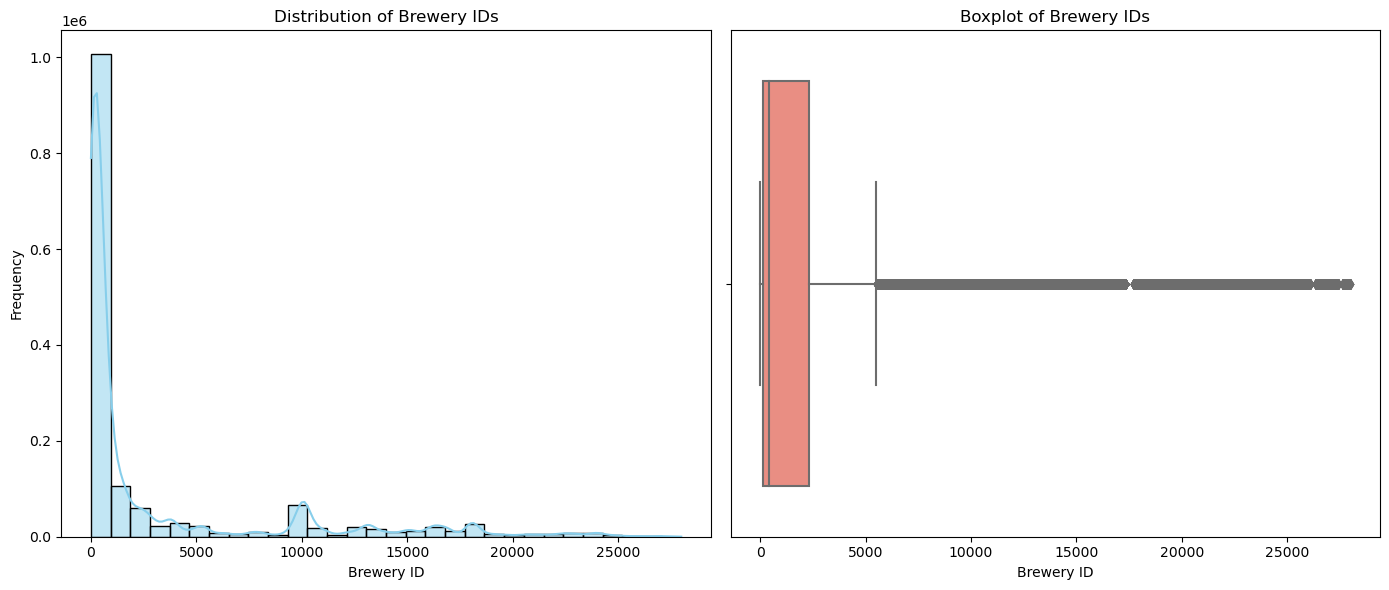

In [19]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_review['brewery_id'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Brewery IDs")
plt.xlabel("Brewery ID")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_review['brewery_id'], color='salmon')
plt.title("Boxplot of Brewery IDs")
plt.xlabel("Brewery ID")

plt.tight_layout()
plt.show()

In [21]:
# Unique Brewery Count

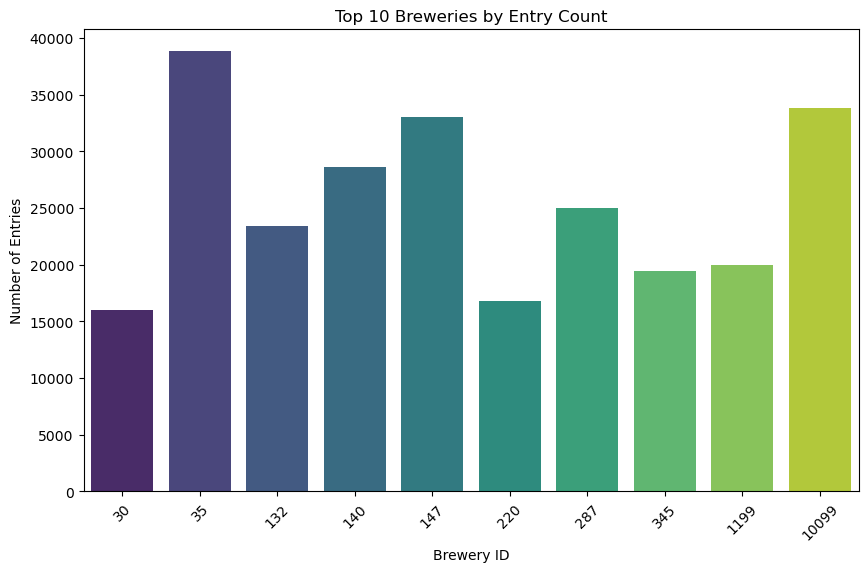

In [20]:
top_breweries = df_review['brewery_id'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_breweries.index, y=top_breweries.values, palette='viridis')
plt.title("Top 10 Breweries by Entry Count")
plt.xlabel("Brewery ID")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Binned brewery_id Categories

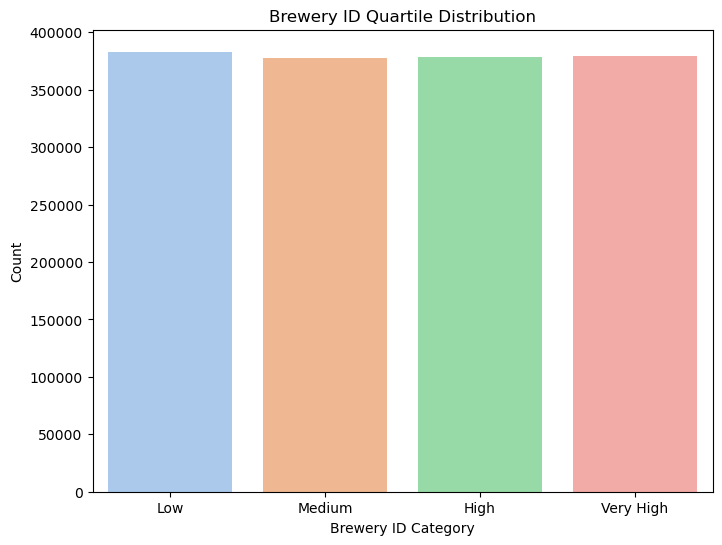

In [24]:
df_review['brewery_id_bins'] = pd.qcut(df_review['brewery_id'], 4, labels=["Low", "Medium", "High", "Very High"])

plt.figure(figsize=(8, 6))
sns.countplot(x='brewery_id_bins', data=df_review, palette='pastel')
plt.title("Brewery ID Quartile Distribution")
plt.xlabel("Brewery ID Category")
plt.ylabel("Count")
plt.show()

In [25]:
# Outlier Detection

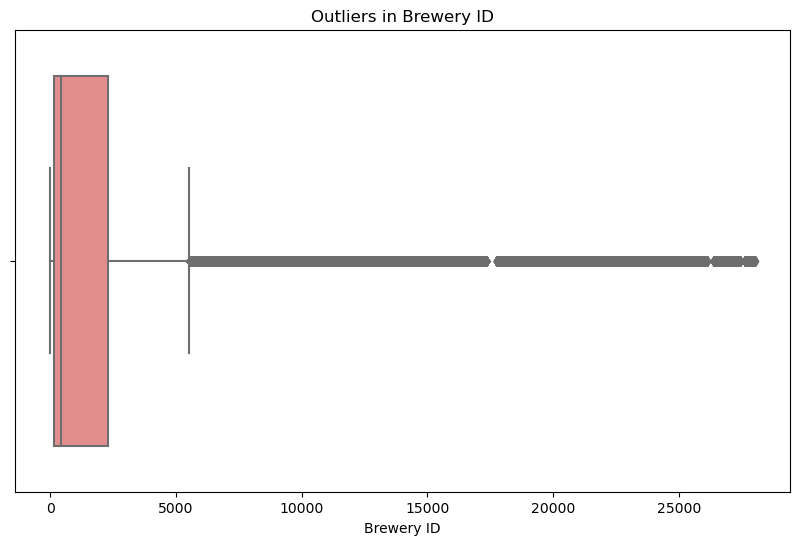

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_review['brewery_id'], color='lightcoral')
plt.title("Outliers in Brewery ID")
plt.xlabel("Brewery ID")
plt.show()

These visualizations should provide insights into the distribution, frequency, and potential relationships associated with **brewery_id**.

### 2) brewery_name

### 3) review_time

In [20]:
df_review['review_time'].head()

0    1234817823
1    1235915097
2    1235916604
3    1234725145
4    1293735206
Name: review_time, dtype: int64

In [21]:
df_review['datetime'] = pd.to_datetime(df_review['review_time'], unit='s')

In [22]:
df_review['review_year'] = df_review['datetime'].dt.year

In [24]:
df_review.rename(columns={'datetime' : 'review_datetime'}, inplace=True)

In [26]:
df_review = df_review.drop('review_time', axis=1)

In [27]:
df_review.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_datetime,review_year
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,2009-02-16 20:57:03,2009
1,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2009-03-01 13:44:57,2009
2,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2009-03-01 14:10:04,2009
3,10325,Vecchio Birraio,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2009-02-15 19:12:25,2009
4,1075,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2010-12-30 18:53:26,2010


### 4) review_overall

In [15]:
df_review.review_overall.value_counts()

review_overall
4.0    559790
4.5    314303
3.5    286901
3.0    155840
5.0     88997
2.5     54660
2.0     35737
1.5     12032
1.0     10211
0.0         7
Name: count, dtype: int64

* It is necessary to check if the review range is between 0 and 5 on **review_overall**. The number of reviews from 1 to 5 is much more than the reviews starting from 0. There might be some errors by reviewers. In this case, I think it would be better to drop reviews with 0 values in **review_overall**.

* Additionally, I noticed that the 7 rows with 0 **review_overall** have 0 **review_appearance** as well.   

In [16]:
df_review = df_review[df_review['review_overall'] != 0.0]

In [17]:
df_review[df_review['review_overall'] == 0.0]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


In [18]:
df_review[df_review['review_appearance'] == 0.0]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid


* There is no more **review_overall** and **review_appearance** with 0.

### 5) review_aroma

### 6) review_appearance

### 7) review_profilename

### 8) beer_style

### 9) review_palate

### 10) review_taste

### 11) beer_name

### 12) beer_abv

### 13) beer_beerid

In [11]:
df_review.rename(columns={'beer_beerid' : 'beer_id'}, inplace=True)

* To have similar column-name-structure, I decided to rename **beer_beerid** to **beer_id**.

In [ ]:
df_review.columns

In [ ]:
columns = 

df_review = df_review[columns]

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">III. Questions & Analysis</p>

<a id="3"></a>

## 1. Which brewery produces the strongest beers by abv?

In [23]:
df_review.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_id'],
      dtype='object')

In [24]:
df_review[['brewery_id', 
           'brewery_name', 
           'review_overall',
           'review_aroma', 
           'review_appearance', 
           'review_profilename',
           'review_palate', 
           'review_taste', 
           'beer_name', 
           'beer_abv']].sort_values('beer_abv', ascending=False)

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,review_palate,review_taste,beer_name,beer_abv
12919,6513,Schorschbräu,4.0,4.0,4.0,kappldav123,4.0,3.5,Schorschbräu Schorschbock 57%,57.70
12939,6513,Schorschbräu,4.0,4.0,3.5,Sunnanek,4.0,4.0,Schorschbräu Schorschbock 43%,43.00
12940,6513,Schorschbräu,3.5,4.0,4.0,kappldav123,4.0,4.5,Schorschbräu Schorschbock 43%,43.00
746399,16315,BrewDog,2.5,5.0,4.0,Gobzilla,4.0,4.5,Sink The Bismarck!,41.00
746376,16315,BrewDog,2.5,5.0,4.5,lwootton,4.5,3.5,Sink The Bismarck!,41.00
...,...,...,...,...,...,...,...,...,...,...
795875,187,Brouwerij Lindemans,5.0,2.5,4.5,Floydster,3.0,3.5,Lindemans Chello,0.01
274913,2444,Companhia Cervejaria Brahma,1.5,1.5,2.0,schiaveto,1.5,1.0,Liber,0.01
274912,2444,Companhia Cervejaria Brahma,1.0,1.0,3.0,DoubleJ,2.0,1.0,Liber,0.01
795876,187,Brouwerij Lindemans,2.5,3.5,4.0,RblWthACoz,3.5,3.0,Lindemans Chello,0.01


In [25]:
df_review[['brewery_id', 
           'brewery_name', 
           'review_overall',
           'beer_name', 
           'beer_abv']].sort_values('beer_abv', ascending=False).head(20)

,brewery_id,brewery_name,review_overall,beer_name,beer_abv
12919,6513,Schorschbräu,4.0,Schorschbräu Schorschbock 57%,57.7
12939,6513,Schorschbräu,4.0,Schorschbräu Schorschbock 43%,43.0
12940,6513,Schorschbräu,3.5,Schorschbräu Schorschbock 43%,43.0
746399,16315,BrewDog,2.5,Sink The Bismarck!,41.0
746376,16315,BrewDog,2.5,Sink The Bismarck!,41.0
746365,16315,BrewDog,5.0,Sink The Bismarck!,41.0
746366,16315,BrewDog,3.5,Sink The Bismarck!,41.0
746367,16315,BrewDog,3.0,Sink The Bismarck!,41.0
746368,16315,BrewDog,3.5,Sink The Bismarck!,41.0
746369,16315,BrewDog,3.5,Sink The Bismarck!,41.0


* It is understood from this table that there might be some duplications. To prevent displaying duplicates, beer names need to be unique. With this, we do not see the same beer name twice.

In [26]:
strongest_beers = df_review[['brewery_id',
                             'brewery_name',
                             'beer_name', 
                             'beer_abv']].sort_values('beer_abv', ascending=False).drop_duplicates('beer_name').head(10)
strongest_beers

,brewery_id,brewery_name,beer_name,beer_abv
12919,6513,Schorschbräu,Schorschbräu Schorschbock 57%,57.70
12939,6513,Schorschbräu,Schorschbräu Schorschbock 43%,43.00
746399,16315,BrewDog,Sink The Bismarck!,41.00
12934,6513,Schorschbräu,Schorschbräu Schorschbock 40%,39.44
996149,15237,De Struise Brouwers,Black Damnation VI - Messy,39.00
748383,16315,BrewDog,Tactical Nuclear Penguin,32.00
12918,6513,Schorschbräu,Schorschbräu Schorschbock 31%,30.86
1042327,173,Hair of the Dog Brewing Company / Brewery and ...,Dave,29.00
746420,16315,BrewDog,Ghost Deer,28.00
293885,35,Boston Beer Company (Samuel Adams),Samuel Adams Utopias,27.00


In [27]:
strongest_beer = strongest_beers.head(1)
strongest_beer

,brewery_id,brewery_name,beer_name,beer_abv
12919,6513,Schorschbräu,Schorschbräu Schorschbock 57%,57.7


In [28]:
brewery_name = strongest_beer['brewery_name'].iloc[0]
beer_abv = strongest_beer['beer_abv'].iloc[0]

In [29]:
print(f"{brewery_name} is the brewery produces strongest beer with {beer_abv} % ABV.")

Schorschbräu is the brewery produces strongest beer with 57.7 % ABV.


## 2) If you had to pick 3 beers to recommend to someone, how would you approach the problem?

* When I think of recommendation scenarios, social media management immediately comes to mind. Social media platforms thrive on content being shared, liked, and reviewed, which helps drive the popularity of accounts and their posts. The most effective form of advertisement is when people come together to share their positive experiences, recommending a new product they have bought and enjoyed.

  In my view, the overall review of a beer is a key indicator of customer satisfaction. A high review score reflects how much people appreciate the product, making it a strong factor in driving recommendations.


* My second approach is twofold. First, when it comes to recommendations, I believe the most important factor in choosing to drink a beverage again is its taste. If people enjoyed a drink they tried previously, they are more likely to want it again. This makes taste and aroma evaluations, such as review_taste and review_aroma, particularly important in understanding preferences.

  On the other hand, my second approach takes the opposite view. In social or entertainment settings, people are often open to trying new things, especially when visiting a venue for the first time. In these cases, the variety of beer styles can reveal people's willingness to experiment and explore different options

* Everyone has a unique palate, and once a particular taste resonates with them, they may prefer to stick with it. This is why review_palate plays a significant role in guiding recommendations, as it reflects the individual’s preference for a certain flavor experience.

* Another approach I would consider is focusing on ABV (alcohol by volume), as beers with a higher ABV often tend to be more memorable and may become highly recommendable.

In [30]:
min_reviews_threshold = 50
beer_counts = df_review.groupby('beer_id').size()
popular_beers = beer_counts[beer_counts >= min_reviews_threshold].index
filtered_beers = df_review[df_review['beer_id'].isin(popular_beers)]

beer_grouped = filtered_beers.groupby(['beer_id', 'beer_name', 'beer_style', 'beer_abv']).agg({
    'review_overall': 'mean',
    'review_aroma': 'mean',
    'review_appearance': 'mean',
    'review_palate': 'mean',
    'review_taste': 'mean',
    'review_profilename': 'count' 
}).reset_index()

recommended_beers = beer_grouped.sort_values(by=['review_overall', 
                                                 'review_aroma', 
                                                 'review_taste', 
                                                 'review_palate'], ascending=False)

top_beers = recommended_beers.groupby('beer_style').head(1).sort_values('review_overall', ascending=False).head(3)


top_beers[['beer_name', 
           'beer_style',  
           'review_overall', 
           'review_aroma', 
           'review_taste', 
           'review_palate',
           'beer_abv',]]

,beer_name,beer_style,review_overall,review_aroma,review_taste,review_palate,beer_abv
4921,Armand'4 Oude Geuze Lente (Spring),Gueuze,4.730769,4.715385,4.730769,4.669231,6.00
4583,Hoppy Birthday,American Pale Ale (APA),4.684615,4.569231,4.546154,4.361538,5.25
4454,Citra DIPA,American Double / Imperial IPA,4.630952,4.690476,4.573413,4.373016,8.00


## 3) What are the factors that impacts the quality of beer the most?

* To determine the factors that most influence a beer's quality, it is essential to evaluate the relationships between them. By doing so, I can uncover how each factor impacts the overall rating. The key column to focus on here is review_overall, and its statistical correlation with the other variables will be analyzed to reveal their effect.

In [31]:
df_review.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv', 'beer_id'],
      dtype='object')

In [32]:
factors = ['review_overall',
           'review_aroma', 
           'review_appearance',
           'review_palate', 
           'review_taste']


corr_metrics = df_review[factors].corr()
corr_metrics.style.background_gradient(cmap='Greens')

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.612797,0.498480,0.699026,0.787177
review_aroma,0.612797,1.000000,0.559084,0.614922,0.714774
review_appearance,0.498480,0.559084,1.000000,0.564558,0.544570
review_palate,0.699026,0.614922,0.564558,1.000000,0.732198
review_taste,0.787177,0.714774,0.544570,0.732198,1.000000


1) The factor with the highest correlation to overall beer quality is **review_taste** at **0.79**. This suggests that the taste of the beer has the most significant impact on how it is rated overall. Focusing on improving the taste of a beer to improve its quality score will likely yield the greatest improvement in ratings.

2) **review_palate** has the second highest correlation with overall quality at **0.70**, which is an indicator of how a beer leaves a taste in your mouth and strongly influences its overall rating. Customer satisfaction can be increased through detailed adjustments and improvements to the content of beverages.

3) **aroma** plays a significant role as seen in the correlation chart with **0.61**. This indicates that the smell of the beer is moderately influential in shaping the overall score, but not as influential as taste or palate. Improving the aromatic profile of a beer can still positively impact the quality score, but not as significantly as taste.

4) **review_appearance** has the lowest correlation with **0.50** for overall quality. While appearance does affect the overall score, it is less influential than other factors such as taste and palate. Visual aspects such as color, foam, and clarity contribute, but they do not determine the quality of the beer.

## 4) I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy?

* To choose a beer where the aroma and appearance align with its style, I can refer to the df_grouped_style DataFrame, which groups beers by their style and calculates the average aroma (**review_aroma**) and appearance (**review_appearance**) ratings for each style. By analyzing these averages, I can identify which beer styles are most likely to offer an aroma and appearance that match reviewers' preferences. Higher average values for these factors within a specific beer style indicate a better match in those categories.

In [33]:
df_grouped_style = df_review.groupby('beer_style')[['review_aroma', 'review_appearance']].mean()

In [34]:
high_quality_beers = df_review[
    (df_review['review_aroma'] >= df_review['beer_style'].map(df_grouped_style['review_aroma'])) &
    (df_review['review_appearance'] >= df_review['beer_style'].map(df_grouped_style['review_appearance']))]

* Filtering in those reviews above average **review_aroma** and **review_appearance**

In [35]:
enjoyed_beers = high_quality_beers.sort_values(by=['review_aroma','review_appearance'], ascending=False)

In [36]:
top_beers = enjoyed_beers[['beer_name', 
                               'brewery_name', 
                               'beer_style', 
                               'review_overall',
                               'review_aroma',
                               'review_appearance']].drop_duplicates(subset='beer_name', keep='first')

In [37]:
top_beers.head(1)

,beer_name,brewery_name,beer_style,review_overall,review_aroma,review_appearance
287,Old Growth Imperial Stout,Caldera Brewing Company,Russian Imperial Stout,5.0,5.0,5.0


* With this code, I was able to filter out beers whose aroma and appearance scores met or exceeded the average for their beer style, and then sort them by overall review score to come up with a list of beers you should buy based on that criterias.

## <p style="background-color:#33475b; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">End of the Project</p>

<a id="4"></a>